在数据分析中，Python和R各有千秋，虽然Python或R都能在数据分析打通关，从采集、清洗(预处理)、分析、可视化，但是在不同的环节，不同的语言易用程度不同。Python胜在干脏活累活，诸如数据采集、数据清洗、机器学习等；而R语言胜在统计分析、可视化等。所以，如果你正好Python和R都入门了，可以考虑两者结合。那么就会遇到今天的问题-**如何在jupyter中使用R语言代码？**


# rpy2包
rpy2包首先是Python包，ta衔接了Python和R，通过rpy2可以运行R语言相关代码、函数、包。

在Jupyter notebook中主要有两种情况
1. 单元格中以Python为主，可以插入**R的代码字符串**
2. 单个的单元格要么只有**R代码**，要么只有**Python代码**

遇到这类问题，各位的电脑要确保
1. 电脑已经安装了Python和R
2. 已安装rpy2包

安装rpy2包``pip3 install rpy2``

```python
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

#R代码运行会尽量以DataFrame显示
pandas2ri.activate()

#运行R代码
robjects.r('R代码字符串')
```



# 运行R代码

```python
rpy2.robjects.r('R代码字符串')
```

rpy2.robjects.r()函数会识别 **R代码字符串**, 并将其执行。

In [25]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri


#直接声明，data frame强制转为DataFrame
pandas2ri.activate()

#R代码
r_code = """
library(dplyr)

text <- c("Because I could not stop for Death -",
          "He kindly stopped for me -",
          "The Carriage held but just Ourselves -",
          "and Immortality")
          
text_df <- tibble(docid=1:4, text=text)
text_df
"""

#运行R代码
robjects.r(r_code)

docid                                    text
1      1    Because I could not stop for Death -
2      2              He kindly stopped for me -
3      3  The Carriage held but just Ourselves -
4      4                         and Immortality

1. 准备一个R代码r_code，该代码会生成R语言的tibble数据类型(R语言中的一种data frame)。
2. robjects.r(r_code) 运行R代码(字符串)
2. 在本例中，使用pandas2ri.activate()强制声明，在Python中将变量text_df以pandas.DataFrame显示

# 调用R数据集
```
rpy2.robjects.r.data('R的数据集名')
```

调用R的数据集

```python
import rpy2.robjects as robjects
```

- robjects.r.data('R数据集名') 准备R数据集，此时Python并没有显示该数据集，可以理解为准备数据
- ``robjects.r['R数据集名']`` 导入R的数据集

In [38]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri

pandas2ri.activate()

#准备iris
robjects.r.data('iris')
#导入iris
iris = robjects.r['iris']
iris

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
1             5.1          3.5           1.4          0.2     setosa
2             4.9          3.0           1.4          0.2     setosa
3             4.7          3.2           1.3          0.2     setosa
4             4.6          3.1           1.5          0.2     setosa
5             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
146           6.7          3.0           5.2          2.3  virginica
147           6.3          2.5           5.0          1.9  virginica
148           6.5          3.0           5.2          2.0  virginica
149           6.2          3.4           5.4          2.3  virginica
150           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

# 调用R语言包
```python 
rpy2.robjects.packages.importr('R包名')
```

R语言中的readr包有read_csv()函数，可以读取csv文件。


In [16]:
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

pandas2ri.activate()

#导入R语言中的readr包
readr = importr("readr")
#使用readr包中的read_csv()函数
mtcars = readr.read_csv("mtcars.csv")
mtcars.head()

R[write to console]: Parsed with column specification:
cols(
  car = col_character(),
  mpg = col_double(),
  cyl = col_double(),
  disp = col_double(),
  hp = col_double(),
  drat = col_double(),
  wt = col_double(),
  qsec = col_double(),
  vs = col_double(),
  am = col_double(),
  gear = col_double(),
  carb = col_double()
)



car   mpg  cyl   disp     hp  drat     wt   qsec   vs   am  \
1          Mazda RX4  21.0  6.0  160.0  110.0  3.90  2.620  16.46  0.0  1.0   
2      Mazda RX4 Wag  21.0  6.0  160.0  110.0  3.90  2.875  17.02  0.0  1.0   
3         Datsun 710  22.8  4.0  108.0   93.0  3.85  2.320  18.61  1.0  1.0   
4     Hornet 4 Drive  21.4  6.0  258.0  110.0  3.08  3.215  19.44  1.0  0.0   
5  Hornet Sportabout  18.7  8.0  360.0  175.0  3.15  3.440  17.02  0.0  0.0   

   gear  carb  
1   4.0   4.0  
2   4.0   4.0  
3   4.0   1.0  
4   3.0   1.0  
5   3.0   2.0

# Cell只运行R代码
上面的几个章节中，每个cell中代码均为Python和R的混用，如果在Cell中只运行R代码，

1. 可以先单独在一个cell中运行 ``%load_ext rpy2.ipython``,
2. 在另外一个cell中使用``%%R``声明本cell中使用的是R代码。

In [1]:
%load_ext rpy2.ipython

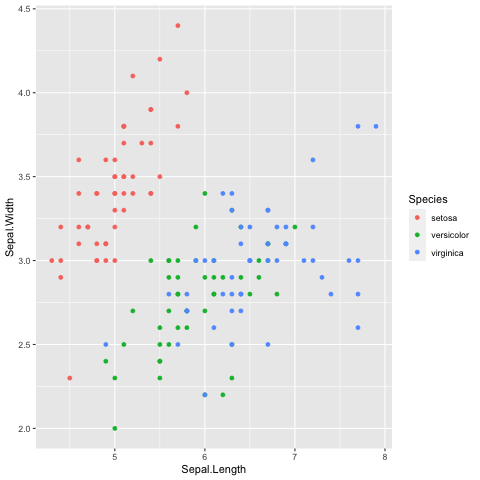

In [12]:
%%R

library(ggplot2)

ggplot(iris, aes(x=Sepal.Length, 
                 y=Sepal.Width, 
                 color=Species))+
geom_point()

In [13]:
%%R -h 550 -w 800  #设置宽、高

library(ggplot2)

ggplot(iris, aes(x=Sepal.Length, 
                 y=Sepal.Width, 
                 color=Species))+
geom_point()